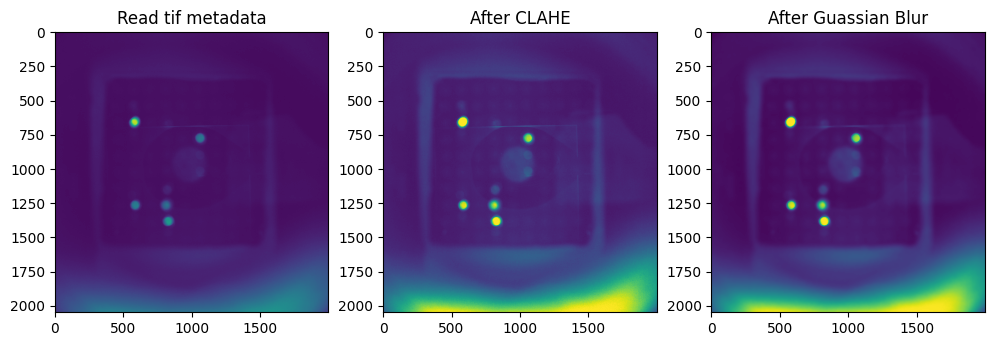

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import matplotlib.image as mpimg

image_path = 'images/experiment 7/diffuser_close_to_light.tif'


with tifffile.TiffFile(image_path) as tif:
    image = tif.asarray()
    metadata = tif.pages[0].tags

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

alpha = 0.15  # contrast
beta = 0   # brightness
clache_image = cv2.convertScaleAbs(clahe_image, alpha=alpha, beta=beta)


denoised_image = cv2.fastNlMeansDenoising(clache_image, None, 30, 7, 21)
guassian_image = cv2.GaussianBlur(denoised_image, (5, 5), 0)


# --- Plot ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Read tif metadata')
plt.imshow(image)

plt.subplot(1, 3, 2)
plt.title('After CLAHE')
plt.imshow(clache_image)

plt.subplot(1, 3, 3)
plt.title('After Guassian Blur')
plt.imshow(guassian_image)

plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_with_signal = cv2.imread('images/experiment 8/nosignal_light_filter.tif', cv2.IMREAD_GRAYSCALE)
image_without_signal = cv2.imread('images/experiment 8/signal_light_filter.tif', cv2.IMREAD_GRAYSCALE)

x1, y1, x2, y2 = 50, 50, 200, 200  # Top-left corner (x, y), width (w), and height (h)

# Crop the ROI from the images
roi_with_signal = image_with_signal[y1:y2, x1:x2]
roi_without_signal = image_without_signal[y1:y2, x1:x2]

# Calculate the intensity in the ROI
intensity_with_signal = np.mean(roi_with_signal)
intensity_without_signal = np.mean(roi_without_signal)

print(f'Intensity with Signal in ROI: {intensity_with_signal}')
print(f'Intensity without Signal in ROI: {intensity_without_signal}')

ratio = intensity_with_signal / intensity_without_signal
print(f'Ratio of Intensities in ROI: {ratio}')

Intensity with Signal in ROI: 0.0
Intensity without Signal in ROI: 0.0
Ratio of Intensities in ROI: nan


/var/folders/lq/cqww8_bs2b50rsgx2v7lr42r0000gn/T/ipykernel_1319/3157445530.py:21: RuntimeWarning: invalid value encountered in scalar divide
  ratio = intensity_with_signal / intensity_without_signal


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/mnt/data/image.png'
image = cv2.imread(image_path)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mouse callback function to get HSV value of the clicked pixel
def get_hsv_value(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        hsv_value = hsv_image[y, x]
        print(f'HSV Value at ({x}, {y}): {hsv_value}')

# Display the image
cv2.imshow('Image', image)
cv2.setMouseCallback('Image', get_hsv_value)

# Wait until a key is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

# Define range for greenish-yellow color in HSV (use the values you found)
lower_bound = np.array([30, 50, 50])   # Adjust these values as needed
upper_bound = np.array([90, 255, 255]) # Adjust these values as needed

# Create a mask for the greenish-yellow regions
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Convert masked image to grayscale to measure intensity
gray_masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

# Display the original and masked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Masked Image')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Gray Masked Image')
plt.imshow(gray_masked_image, cmap='gray')

plt.show()

# Calculate the intensity of the masked regions
intensity = np.sum(gray_masked_image) / np.count_nonzero(gray_masked_image)
print(f'Intensity of greenish-yellow regions: {intensity}')
